### Importing Project Libraries

In [1]:
import sys
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user tensorflow
!{sys.executable} -m pip install --user keras
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user pandas
!{sys.executable} -m pip install --user matplotlib

# Import necessary libraries
import numpy as np
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Verify TensorFlow version to ensure it's installed correctly
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.16.1


## Data Preprocessing

### Training Image preprocessing

In [2]:
# Load Data to be used
training_set = tf.keras.utils.image_dataset_from_directory(
    'DATASET/TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 22564 files belonging to 2 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'DATASET/DATASET/TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 22564 files belonging to 2 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

## Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,620,450 (25.26 MB)

 Trainable params: 6,620,450 (25.26 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 281s 393ms/step - accuracy: 0.7145 - loss: 8.1049 - val_accuracy: 0.8389 - val_loss: 0.3904
Epoch 2/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 283s 401ms/step - accuracy: 0.8303 - loss: 0.4034 - val_accuracy: 0.8426 - val_loss: 0.3625
Epoch 3/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 284s 402ms/step - accuracy: 0.8389 - loss: 0.3916 - val_accuracy: 0.8114 - val_loss: 0.4495
Epoch 4/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 278s 394ms/step - accuracy: 0.8464 - loss: 0.3668 - val_accuracy: 0.8739 - val_loss: 0.3334
Epoch 5/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 275s 390ms/step - accuracy: 0.8572 - loss: 0.3537 - val_accuracy: 0.8551 - val_loss: 0.3593
Epoch 6/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 269s 381ms/step - accuracy: 0.8607 - loss: 0.3416 - val_accuracy: 0.8849 - val_loss: 0.2885
Epoch 7/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 375s 531ms/step - accuracy: 0.8640 - loss: 0.3372 - val_accuracy: 0.8901 - val_loss: 0.2929
Epoch 8/32
706/706 ━━━━━━━━━━━━━━━━━━━━ 317s 439ms/step - accuracy: 0.8621 -

## Evaluating Model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9874 - loss: 0.0426
Training accuracy: 0.9877681136131287


In [18]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

706/706 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.9879 - loss: 0.0383
Validation accuracy: 0.9877681136131287


## Saving Model

In [19]:

cnn.save('trained_model.h5')

In [20]:
training_history.history #Return Dictionary of history

{'accuracy': [0.779649019241333,
  0.8327423930168152,
  0.84125155210495,
  0.8492732048034668,
  0.8567186594009399,
  0.8611061573028564,
  0.8666016459465027,
  0.8671334981918335,
  0.8736482858657837,
  0.8829551339149475,
  0.8843733668327332,
  0.895054042339325,
  0.9031643271446228,
  0.908305287361145,
  0.91570645570755,
  0.9254564642906189,
  0.9316167235374451,
  0.938220202922821,
  0.9456656575202942,
  0.946906566619873,
  0.9516929388046265,
  0.9534657001495361,
  0.9527565836906433,
  0.9603350758552551,
  0.9613543748855591,
  0.9656532406806946,
  0.9583407044410706,
  0.9666725993156433,
  0.9646782279014587,
  0.9719464778900146,
  0.9697748422622681,
  0.9730987548828125],
 'loss': [1.732525110244751,
  0.3983376920223236,
  0.3818260133266449,
  0.36346885561943054,
  0.3517504930496216,
  0.3412880003452301,
  0.33273348212242126,
  0.3291360139846802,
  0.3167552947998047,
  0.3004581332206726,
  0.2971523702144623,
  0.27610981464385986,
  0.25560241937637

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Calculating Accuracy of Model Achieved on Validation set

In [23]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 98.77681136131287 %


## Accuracy Visualization

### Training Visualization

In [24]:
training_history.history['accuracy']

[0.779649019241333,
 0.8327423930168152,
 0.84125155210495,
 0.8492732048034668,
 0.8567186594009399,
 0.8611061573028564,
 0.8666016459465027,
 0.8671334981918335,
 0.8736482858657837,
 0.8829551339149475,
 0.8843733668327332,
 0.895054042339325,
 0.9031643271446228,
 0.908305287361145,
 0.91570645570755,
 0.9254564642906189,
 0.9316167235374451,
 0.938220202922821,
 0.9456656575202942,
 0.946906566619873,
 0.9516929388046265,
 0.9534657001495361,
 0.9527565836906433,
 0.9603350758552551,
 0.9613543748855591,
 0.9656532406806946,
 0.9583407044410706,
 0.9666725993156433,
 0.9646782279014587,
 0.9719464778900146,
 0.9697748422622681,
 0.9730987548828125]

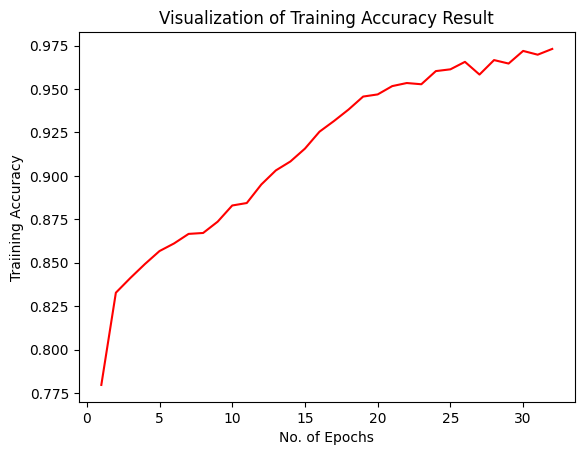

In [25]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy

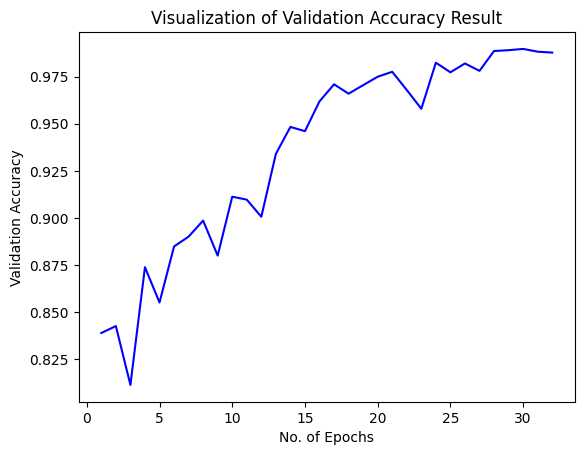

In [26]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Test set Evaluation

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'DATASET/TEST',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2513 files belonging to 2 classes.


In [28]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.8850 - loss: 0.5944
Test accuracy: 0.8782331943511963
